### aim: 

### date: 

In [25]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [26]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [27]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)



In [28]:
import getKDE as gk
reload(gk)

<module 'getKDE' from '/gpfs/scratch/mep22dku/windEval/plottingCode/getKDE.py'>

In [29]:
import getKDE as gk
reload(gk)
help(gk.get_gaussian_kde)

# gk.get_gaussian_kde('ERA5','DJF',1940,1940,0,25,100,0,60)
# gk.get_gaussian_kde('ERA5','DJF',1940,1940,0,25,200,0,60)
# gk.get_gaussian_kde('ERA5','DJF',1940,1940,0,25,1000,0,60)

# gk.get_gaussian_kde('ERA5','DJF',1940,1940,0,25,100,0,40)
# gk.get_gaussian_kde('ERA5','DJF',1940,1940,0,25,200,0,40)
# gk.get_gaussian_kde('ERA5','DJF',1940,1940,0,25,1000,0,40)

# gk.get_gaussian_kde('ERA5','DJF',1940,1940,0,25,100,30,50)
# gk.get_gaussian_kde('ERA5','DJF',1940,1940,0,25,200,30,50)
# gk.get_gaussian_kde('ERA5','DJF',1940,1940,0,25,1000,30,50)

Help on function get_gaussian_kde in module getKDE:

get_gaussian_kde(prod='UKESM', seas='FY', yst=1940, yen=1949, xmi=0, xma=25, nobins=100, latsta=30, late=50, ozone=True)



In [30]:
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', \
        '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8',\
        '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

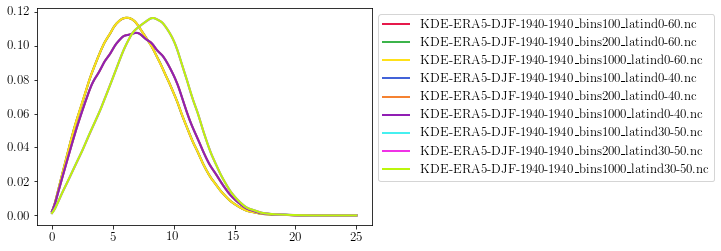

In [35]:
ti = [
    'KDE-ERA5-DJF-1940-1940_bins100_latind0-60.nc',
    'KDE-ERA5-DJF-1940-1940_bins200_latind0-60.nc',
    'KDE-ERA5-DJF-1940-1940_bins1000_latind0-60.nc',
    'KDE-ERA5-DJF-1940-1940_bins100_latind0-40.nc',
    'KDE-ERA5-DJF-1940-1940_bins200_latind0-40.nc',
    'KDE-ERA5-DJF-1940-1940_bins1000_latind0-40.nc',
    'KDE-ERA5-DJF-1940-1940_bins100_latind30-50.nc',
    'KDE-ERA5-DJF-1940-1940_bins200_latind30-50.nc',
    'KDE-ERA5-DJF-1940-1940_bins1000_latind30-50.nc'
]


tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'

plt.figure()

for i in range(0,9):
    
    w = xr.open_dataset(f'{tdir}{ti[i]}')
    plt.plot(w.kde_x, w.kde, color = cols[i], linewidth = 2,\
             label = ti[i])#linestyle = ls)
    plt.legend(bbox_to_anchor = [1,1])


In [32]:
w = xr.open_dataset(f'{tdir}{ti[0]}')
w2 = xr.open_dataset(f'{tdir}{ti[1]}')

In [33]:
print(w2.kde - w.kde)

<xarray.DataArray 'kde' (kde_x: 2)>
array([0., 0.])
Coordinates:
  * kde_x    (kde_x) float64 0.0 25.0
